# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_84_genes_32_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,APAF1,ARID1A,ATM,BAP1,EPAS1,ERBB2,FLT1,FLT4,GSTP1,...,SETD2,SLC2A1,SOD2,TGM2,TP53,TSC1,TSC2,VEGFA,VHL,Y
0,0,32.668769,33.848026,35.942429,33.677294,37.95811,35.32243,33.69326,30.79376,36.48088,...,32.58565,33.38586,38.67433,38.50142,33.83518,32.93402,34.93520,37.79678,32.30615,1
1,1,32.337493,33.843513,35.988225,32.643149,38.83281,33.71706,35.56873,33.38444,36.21403,...,33.19915,33.69538,38.64559,34.33752,34.44810,33.16630,35.08304,40.09193,32.19988,1
2,2,31.818198,33.516005,36.193587,32.368866,37.19345,33.38917,34.21918,33.34670,35.34069,...,32.84628,36.23588,40.50559,35.50178,35.41980,33.63282,34.79244,38.22308,31.49147,1
3,3,32.601293,34.197698,36.578348,31.895400,39.46713,33.22340,36.25593,34.21029,35.36208,...,33.68316,34.41938,38.99231,35.77236,34.18862,32.88250,35.02014,39.94908,32.11538,0
4,4,33.593121,33.351460,36.807497,33.968348,38.49884,33.40876,35.39769,34.92401,34.26885,...,34.63036,34.59911,38.41437,33.47112,34.91241,33.44515,35.01310,39.31564,33.33646,1


In [3]:
X = data.iloc[:,1:33  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

         APAF1     ARID1A        ATM       BAP1     EPAS1     ERBB2      FLT1  \
0    32.668769  33.848026  35.942429  33.677294  37.95811  35.32243  33.69326   
1    32.337493  33.843513  35.988225  32.643149  38.83281  33.71706  35.56873   
2    31.818198  33.516005  36.193587  32.368866  37.19345  33.38917  34.21918   
3    32.601293  34.197698  36.578348  31.895400  39.46713  33.22340  36.25593   
4    33.593121  33.351460  36.807497  33.968348  38.49884  33.40876  35.39769   
..         ...        ...        ...        ...       ...       ...       ...   
176  32.603769  34.133940  35.318612  33.843872  39.13826  33.62978  35.17642   
177  33.619701  32.373330  35.771711  32.519967  35.86338  31.25871  32.24347   
178  33.316811  34.118843  36.008091  33.115209  37.91340  32.66502  35.55199   
179  33.046782  33.833796  37.008936  32.895151  37.96870  33.57688  35.18870   
180  32.170042  33.739764  35.937812  33.404526  38.75226  32.10887  32.99715   

         FLT4     GSTP1    

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=3, n_estimators=10, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6110837438423645


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9236111111111112
Final accuracy on the testing dataset: 0.5405405405405406


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  1]
 [10 66]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.99      0.87      0.92        76

    accuracy                           0.92       144
   macro avg       0.93      0.93      0.92       144
weighted avg       0.93      0.92      0.92       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  6]
 [11  9]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56        17
           1       0.60      0.45      0.51        20

    accuracy                           0.54        37
   macro avg       0.55      0.55      0.54        37
weighted avg       0.55      0.54      0.54        37



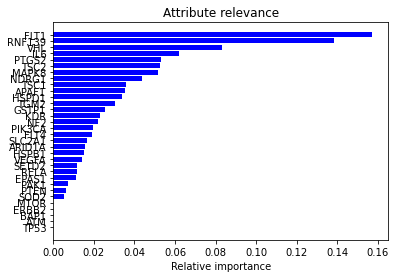

APAF1 = 0.03543848515760265
ARID1A = 0.015553388356837242
ATM = 0.0
BAP1 = 0.0
EPAS1 = 0.011037131143194882
ERBB2 = 0.0
FLT1 = 0.15716592281293426
FLT4 = 0.019010699581276103
GSTP1 = 0.02563689733165711
HSPB1 = 0.015220964152469086
HSPD1 = 0.03385528266712652
IL6 = 0.06178677980107289
KDR = 0.02290785292838224
MAPK8 = 0.05152771675032804
MTOR = 0.0
NDRG1 = 0.04354074318269891
NF2 = 0.022160564741973927
PAK1 = 0.007397423098851001
PIK3CA = 0.019360556721446775
PTEN = 0.006136569568437815
PTGS2 = 0.05287303691152313
RELA = 0.011560829621043786
RNF139 = 0.13829240092193612
SETD2 = 0.011765168656470032
SLC2A1 = 0.016594397935107794
SOD2 = 0.005062523614672897
TGM2 = 0.03051446833064781
TP53 = 0.0
TSC1 = 0.03577923848995897
TSC2 = 0.052680268920669016
VEGFA = 0.013919135427442048
VHL = 0.08322155317423897


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.